# Завдання (крок за кроком)

**1. Зчитай дані з файлу та виведи інформацію про результати A/B тесту:**  
- Кількість користувачів в групах **A** та **B** відповідно  
- Кількість конверсій в групах **A** та **B** відповідно  
- Рівень конверсії в групах **A** та **B** відповідно  
- Дату початку та дату кінця тесту, а також **тривалість тесту в днях**  

---

**2. Обери статистичний критерій для тестування гіпотез на свій розсуд:**  
- Обрахуй значення статистики та *p-value*  
- Перевір, чи можемо ми відхилити нульову гіпотезу  
- Уточни, який критерій вористовуєш 😉  

---

**3. Побудуй візуалізацію:**  
- Для порівняння середніх значень у групах з **95% довірчими інтервалами**  

---

**4. Підготуй висновки:**  
- Зроби висновки про результати A/B тесту згідно з рекомендаціями  

---

## 🎁 Бонусне завдання
Побудуй графік, що відображатиме **зміну конверсії в часі**  
(врахуй, що у нас є дані про час здійснення івенту).  
час здійснення івенту. у форматі pdf або зображення.

In [2]:
import pandas as pd

In [3]:
from scipy import stats

In [4]:
df_ab = pd.read_csv('ab_test_data.csv')
df_ab

,user_id,timestamp,test_group,conversion
0,7f6833e6-1141-4f20-b4b2-f1e31019b1fd,2023-07-04 04:40:55.848109,a,0
1,e6a6e960-d3f3-4074-a516-ba1e609b211e,2023-07-06 00:26:45.486187,b,0
2,4d3fbfa5-6847-410a-bac2-477f01d5f400,2023-07-10 20:24:33.639464,b,0
3,361457d9-a044-48f7-981c-d67dc3861679,2023-07-20 07:04:49.957013,b,0
4,285cd63d-7d03-427f-a062-1fa2dd2e77d6,2023-07-19 23:27:50.116680,b,0
...,...,...,...,...
19993,6763ae9a-515c-473e-af00-0d9c4f6a5bc7,2023-07-06 03:27:37.041104,b,0
19994,ac5600f2-4d16-4503-b115-f1a96728b6d1,2023-07-03 04:20:48.572143,a,0
19995,5a8b2630-209b-4d83-b47f-0f3d9dd568a8,2023-07-23 16:23:49.211910,b,1
19996,b572d68b-26ac-432b-9f88-83e0fdee4ca1,2023-07-03 18:26:20.880675,b,0


In [12]:
# Кількість користувачів в групах A та B відповідно
users_a = df_ab[df_ab['test_group'] == 'a']['user_id'].nunique()
users_b = df_ab[df_ab['test_group'] == 'b']['user_id'].nunique()
print('users_a: ', users_a, ',',
      'users_b: ', users_b)

users_a:  10013 , users_b:  9985


In [15]:
# Кількість конверсій в групах A та B відповідно
conv_a = df_ab[df_ab['test_group'] == 'a']['conversion'].sum()
conv_b = df_ab[df_ab['test_group'] == 'b']['conversion'].sum()
print('conv_a: ', conv_a, ',',
      'conv_b: ', conv_b)

conv_a:  611 , conv_b:  889


In [16]:
# Рівень конверсії в групах A та B відповідно
cr_a = conv_a/users_a * 100
cr_b = conv_b/users_b * 100
print ('CR A: ', cr_a,',', 'CR B: ', cr_b)

CR A:  6.102067312493758 , CR B:  8.903355032548824


In [18]:
df_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     19998 non-null  object
 1   timestamp   19998 non-null  object
 2   test_group  19998 non-null  object
 3   conversion  19998 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 625.1+ KB


In [20]:
df_ab['timestamp'] = pd.to_datetime(df_ab['timestamp'], format = 'mixed')
df_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     19998 non-null  object        
 1   timestamp   19998 non-null  datetime64[ns]
 2   test_group  19998 non-null  object        
 3   conversion  19998 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 625.1+ KB


In [21]:
# Дату початку та дату кінця тесту, а також тривалість тесту в днях
first_date = df_ab['timestamp'].min()
last_date = df_ab['timestamp'].max()
duration = (last_date - first_date).days
print('First date: ', first_date)
print('Last date: ', last_date)
print('Duration, days: ', duration)

First date:  2023-07-03 01:42:34.033708
Last date:  2023-07-25 01:41:19.152664
Duration, days:  21


In [6]:
# Обери статистичний критерій для тестування гіпотез на свій розсуд
## Критерій Хі-квадрат
alpha = 0.05

observed = pd.crosstab(df_ab['test_group'].values, df_ab['conversion'].values)
statistic, pvalue, dof, expected_values = stats.chi2_contingency(observed)

print(f't-statistic: {round(statistic, 2)}, p-value: {round(pvalue, 2)}')

if pvalue < alpha:
    print('The difference is statistically significant, Null Hypothesis is rejected.')
else:
    print('The difference is insignificant, Null Hypothesis cannot rejected.')


t-statistic: 56.14, p-value: 0.0
The difference is statistically significant, Null Hypothesis is rejected.


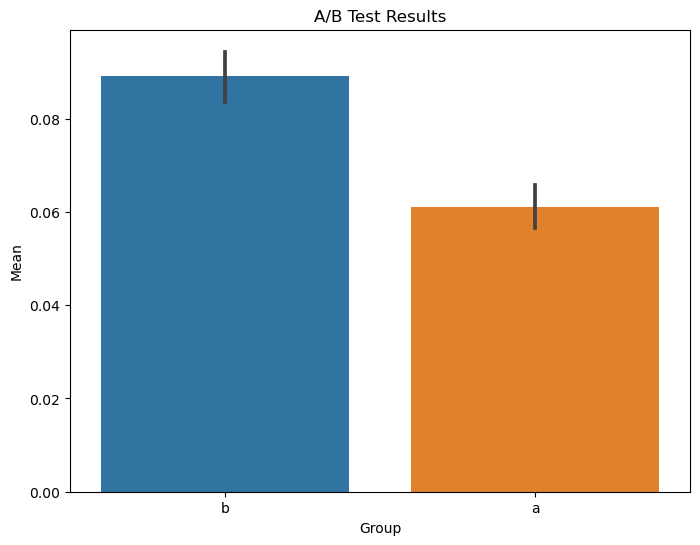

In [12]:
# Візуалізація для порівняння середніх значень у групах з 95% довірчими інтервалами
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=df_ab['test_group'], 
            y=df_ab['conversion'], 
            errorbar=('ci', 95)) # Confidence Intervals

plt.title('A/B Test Results')
plt.xlabel('Group')
plt.ylabel('Mean')

plt.savefig("A_B_Test_Results.pdf", dpi=300, bbox_inches="tight")
plt.show()


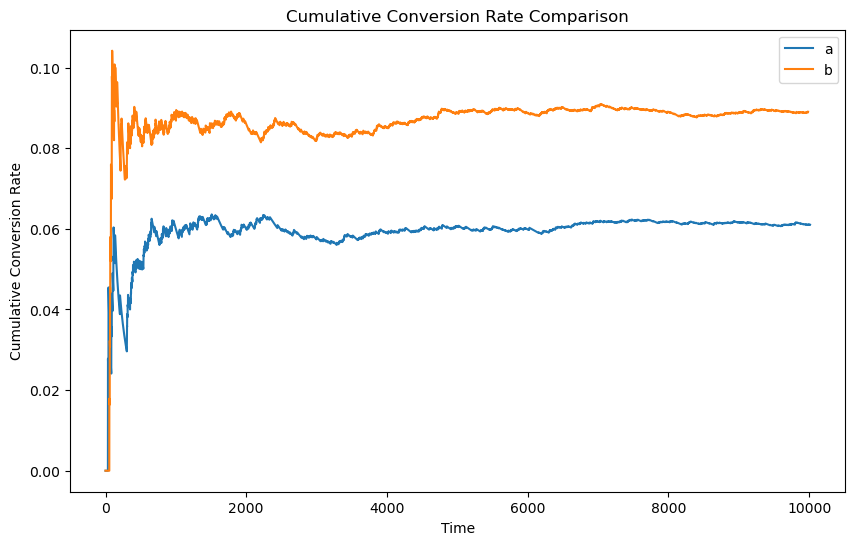

In [10]:
# Графік, що відображатиме зміну конверсії в часі

# Сортування за датою та часом
df_ab = df_ab.sort_values('timestamp')

# Рахуємо кумулятивне середнє - це і є зміна конверсії з плином часу
cumulative_metric_a = df_ab[df_ab['test_group'] == 'a']['conversion'].expanding().mean().reset_index(drop=True)
cumulative_metric_b = df_ab[df_ab['test_group'] == 'b']['conversion'].expanding().mean().reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_metric_a, label='a')
plt.plot(cumulative_metric_b, label='b')

plt.title('Cumulative Сonversion Rate Comparison')
plt.xlabel('Time')
plt.ylabel('Cumulative Сonversion Rate')

plt.legend()
plt.savefig("cumulative_conversion.pdf", dpi=300, bbox_inches="tight")
plt.show()
